## Analyzing Data

### Importing basic Libraries and Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Gender_Height_Weight_Index.csv')
data_copy = pd.read_csv('Gender_Height_Weight_Index.csv')

In [3]:
data.shape

(500, 4)

In [4]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [5]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


### Checking for null values

In [6]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

### Importing Visualizations and Plotting libraries

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [7]:
data['Index'].unique()

array([4, 2, 3, 5, 1, 0], dtype=int64)

### Adding additional column with defined status

In [8]:
def convert_index(x):
    if x['Index'] == 0:
        return 'Very Underweight'
    elif x['Index'] == 1:
        return 'Underweight'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index'] == 4:
        return 'Obese'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
data_copy['Status'] = data_copy.apply(convert_index, axis = 1)
data_copy.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obese
1,Male,189,87,2,Normal
2,Female,185,110,4,Obese
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [9]:
def encode_gender(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 2
data_copy['Gender_lbl'] = data_copy.apply(encode_gender, axis=1)
data_copy.head()

,Gender,Height,Weight,Index,Status,Gender_lbl
0,Male,174,96,4,Obese,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obese,2
3,Female,195,104,3,Overweight,2
4,Male,149,61,3,Overweight,1


### Scatter plot showing different categories for allthe points in the data

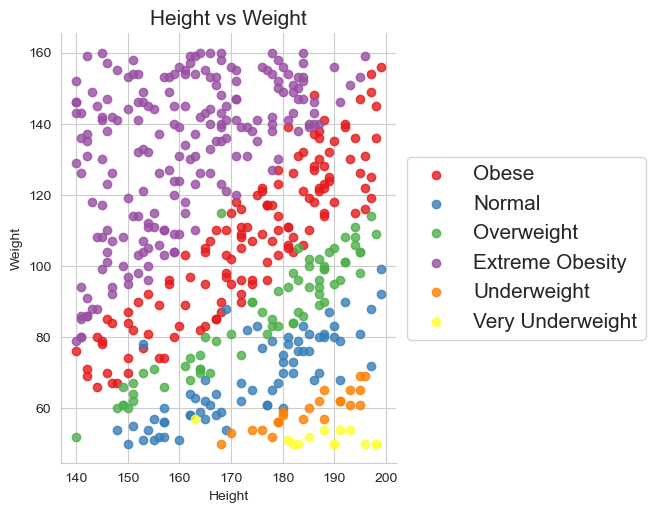

In [10]:
sns.set_style('whitegrid')
g=sns.lmplot(x='Height',y='Weight', data=data_copy,  fit_reg=False, hue='Status', legend=False, palette='Set1', aspect = 1)
ax1 = g.ax
ax1.set_title('Height vs Weight', size=15)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.show()

### 3D Scatter plot to differentiate between male and female

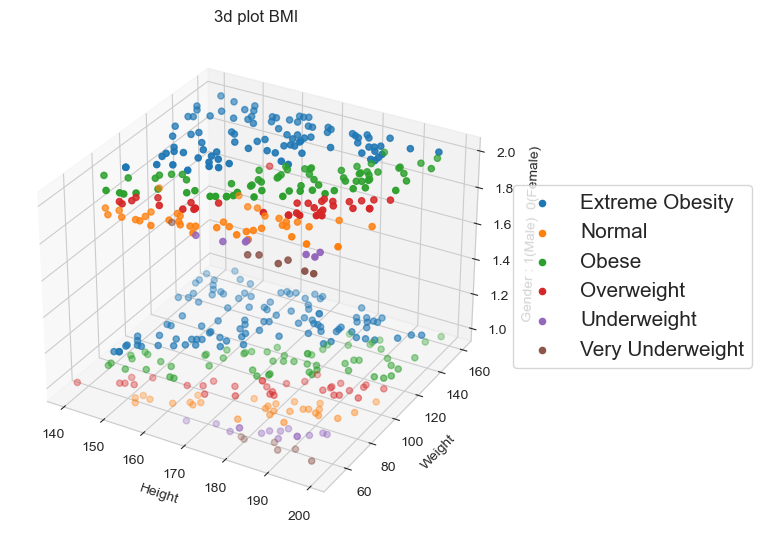

In [11]:
groups = data_copy.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.Gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

### Counting people based on Gender

In [12]:
people = data_copy['Gender'].value_counts()
people.head()

Gender
Female    255
Male      245
Name: count, dtype: int64

In [13]:
categories = data_copy['Status'].value_counts()
categories.head()

Status
Extreme Obesity    198
Obese              130
Normal              69
Overweight          68
Underweight         22
Name: count, dtype: int64

### Pie Plot representing Gender and Health status

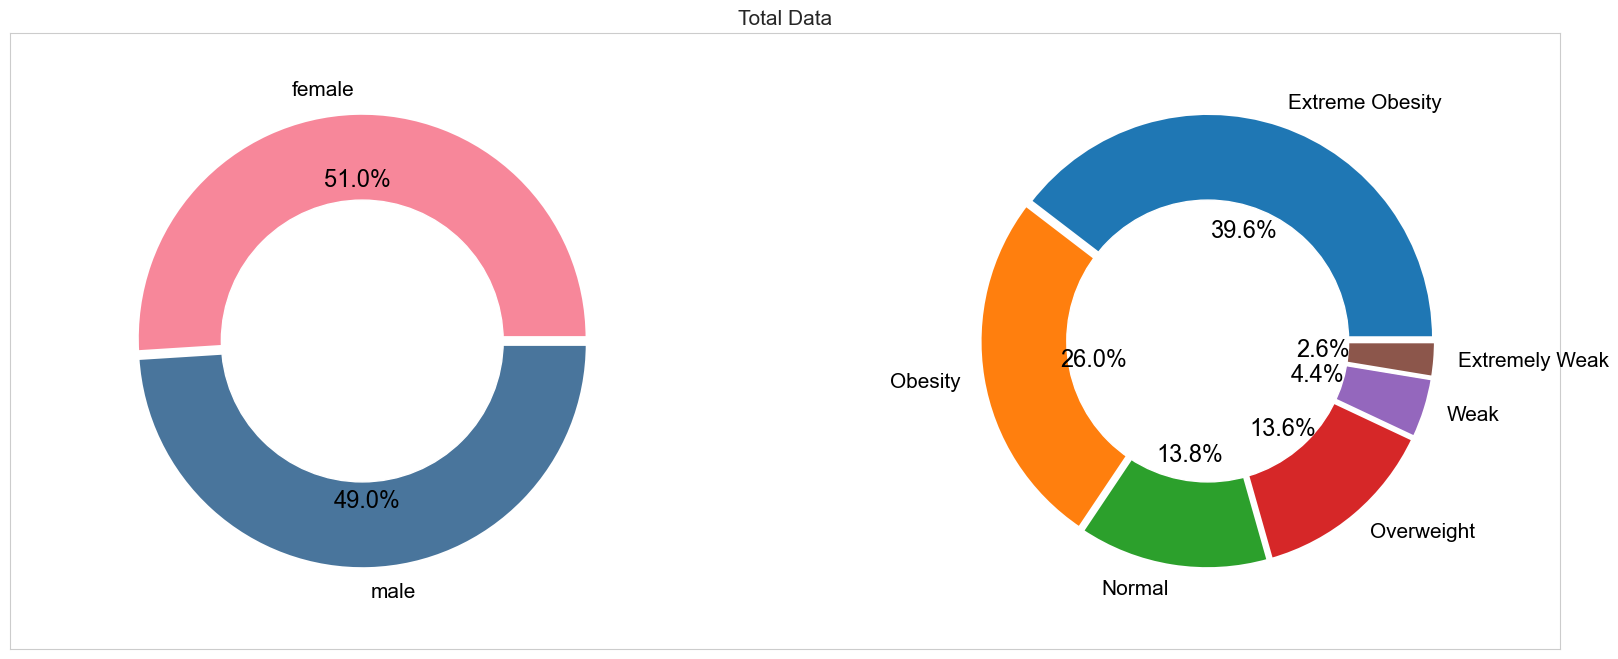

In [14]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() 
p.gca().add_artist(my_circle)


ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() 
p.gca().add_artist(my_circle)
plt.show()

In [15]:
data_copy_male = data_copy[data_copy['Gender']=='Male']
data_copy_male.head()

,Gender,Height,Weight,Index,Status,Gender_lbl
0,Male,174,96,4,Obese,1
1,Male,189,87,2,Normal,1
4,Male,149,61,3,Overweight,1
5,Male,189,104,3,Overweight,1
6,Male,147,92,5,Extreme Obesity,1


In [16]:
data_copy_male_categories = data_copy_male.Status.value_counts()
data_copy_male_categories.head()

Status
Extreme Obesity    105
Obese               59
Overweight          32
Normal              28
Underweight         15
Name: count, dtype: int64

In [17]:
data_copy_female = data_copy[data_copy['Gender']=='Female']
data_copy_female.head()

,Gender,Height,Weight,Index,Status,Gender_lbl
2,Female,185,110,4,Obese,2
3,Female,195,104,3,Overweight,2
9,Female,169,103,4,Obese,2
11,Female,159,80,4,Obese,2
12,Female,192,101,3,Overweight,2


In [18]:
data_copy_female_categories = data_copy_female.Status.value_counts()
data_copy_female_categories.head()

Status
Extreme Obesity    93
Obese              71
Normal             41
Overweight         36
Underweight         7
Name: count, dtype: int64

### Pie plot representing Health status by Gender

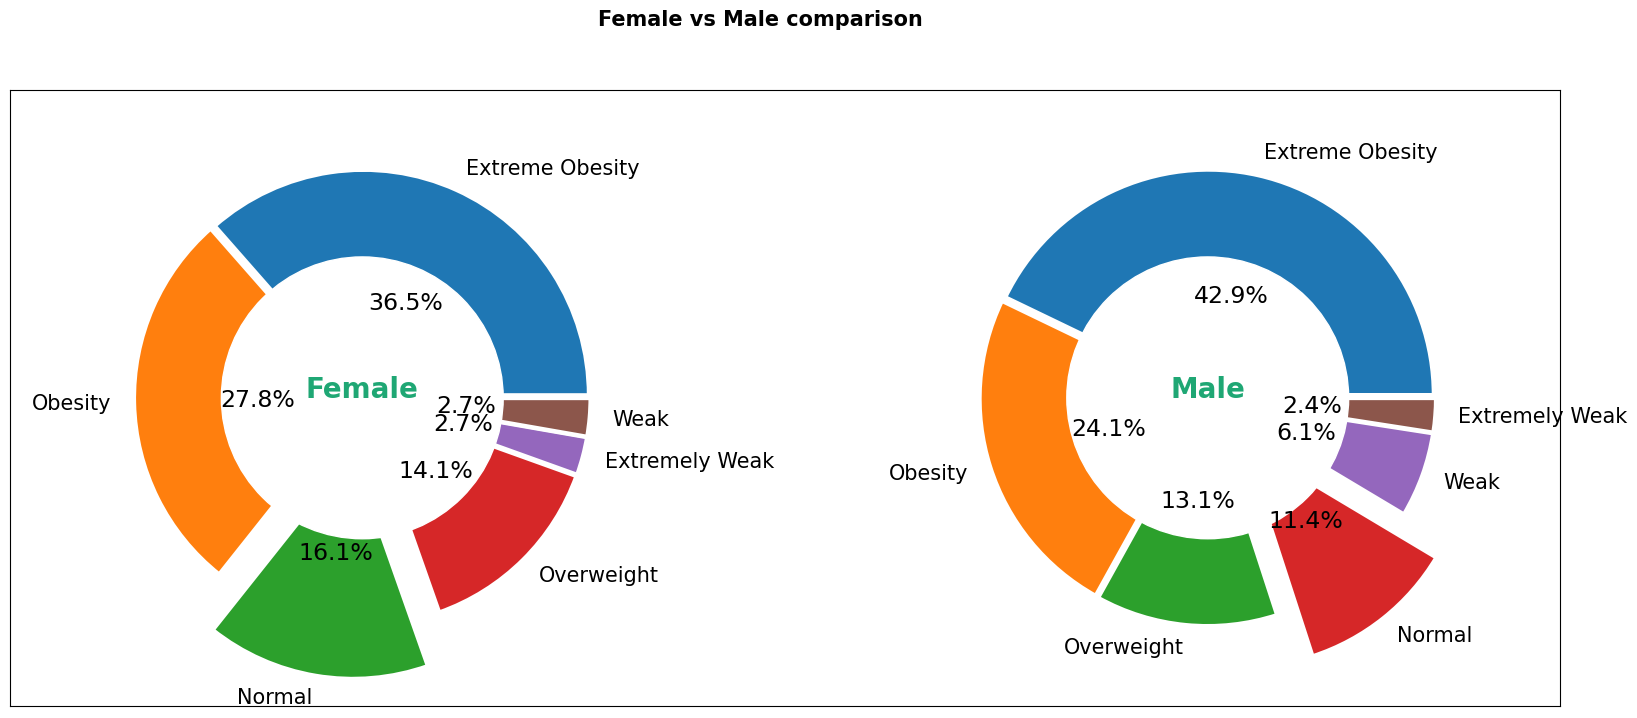

In [19]:

plt.style.use('default')


fig = plt.figure(figsize=(20, 8))
fig.suptitle("Female vs Male comparison", fontsize=15, fontweight='bold')

# Disable ticks (optional for pie charts)
plt.xticks([])
plt.yticks([])


ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01, 0.01, 0.2, 0.01, 0.01, 0.01)

wedges, texts, autotexts = ax1.pie(
    data_copy_female_categories,
    radius=0.8,
    explode=explode,
    labels=['Extreme Obesity', 'Obesity', 'Normal', 'Overweight', 'Extremely Weak', 'Weak'],
    autopct="%1.1f%%",
    pctdistance=0.45,
    textprops=dict(color='k'),
    wedgeprops={'linewidth': 3, 'edgecolor': 'w'}
)
plt.setp(autotexts, fontsize=17)
plt.setp(texts, fontsize=15)
my_circle = plt.Circle((0, 0), 0.5, color='white')
ax1.add_artist(my_circle)
ax1.text(0, 0, 'Female', fontsize=20, color='#1fa774', horizontalalignment='center', fontweight='bold')


ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01, 0.01, 0.01, 0.2, 0.01, 0.01)

wedges2, texts2, autotexts2 = ax2.pie(
    data_copy_male_categories,
    radius=0.8,
    explode=explode,
    labels=['Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Weak', 'Extremely Weak'],
    autopct="%1.1f%%",
    pctdistance=0.45,
    textprops=dict(color='k'),
    wedgeprops={'linewidth': 3, 'edgecolor': 'w'}
)
plt.setp(autotexts2, fontsize=17)
plt.setp(texts2, fontsize=15)
my_circle = plt.Circle((0, 0), 0.5, color='white')
ax2.add_artist(my_circle)
ax2.text(0, 0, 'Male', fontsize=20, color='#1fa774', horizontalalignment='center', fontweight='bold')


plt.show()

# Machine Learning

### Importing Libraries and Encoding values

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df = pd.DataFrame(data)
df['Gender'] = le.fit_transform(df['Gender'])
df.sample(10)

,Gender,Height,Weight,Index
220,0,173,82,2
356,0,189,124,4
313,0,179,67,2
420,0,195,61,1
38,0,171,152,5
46,0,188,122,4
77,0,168,90,4
45,1,185,76,2
110,0,150,70,4
94,1,197,119,4


### Feature Scaling

In [22]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
df.iloc[:,0:-1] = std_sc.fit_transform(df.iloc[:,0:-1])
df.head(10)

,Gender,Height,Weight,Index
0,1.020204,0.247939,-0.309117,4
1,1.020204,1.164872,-0.587322,2
2,-0.980196,0.920357,0.123647,4
3,-0.980196,1.531645,-0.061823,3
4,1.020204,-1.280283,-1.391027,3
5,1.020204,1.164872,-0.061823,3
6,1.020204,-1.402541,-0.432764,5
7,1.020204,-0.974639,0.154559,5
8,1.020204,0.247939,-0.494587,3
9,-0.980196,-0.057706,-0.092735,4


### Splitting the Data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Index'])
Y = df['Index']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

### Enemble Learning using Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', class_weight = 'balanced', random_state = 0)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=200, random_state=0)

### Predicting results

In [26]:
y_pred_rfc = model.predict(x_test)

### Evaluating the model

In [27]:
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[ 1,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  2, 19,  2,  1,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  3, 28,  7],
       [ 0,  0,  0,  0,  2, 46]], dtype=int64)

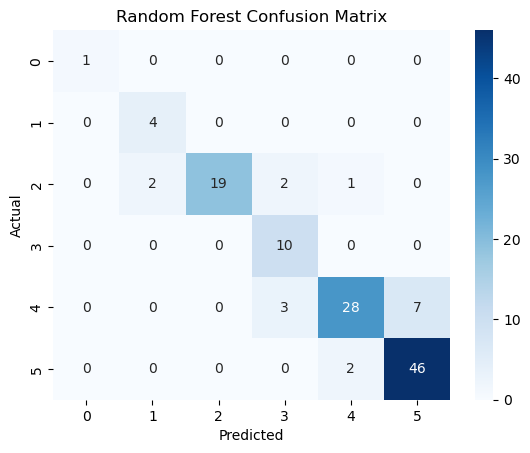

In [29]:
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
acc_rfc = accuracy_score(y_test, y_pred_rfc)
acc_rfc

0.864

### Calculating Optimal number of trees in the Random Forest Classifier

In [31]:
def trees_in_forest_vs_acc(trees, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test):
    rfc_model = RandomForestClassifier(n_estimators = trees, criterion = 'entropy', random_state = 0)
    rfc_model.fit(x_train, y_train)
    y_pred = rfc_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [32]:
trees_list = [100, 200, 300, 500, 600, 700, 800, 900, 100]
acc_score_for_tree_list = []
for x in trees_list:
    acc_score_for_tree_list.append(trees_in_forest_vs_acc(x))
acc_score_for_tree_list

[0.848, 0.864, 0.864, 0.856, 0.856, 0.856, 0.864, 0.864, 0.848]

### Visualizing No. of trees vs their Accuracy Scores

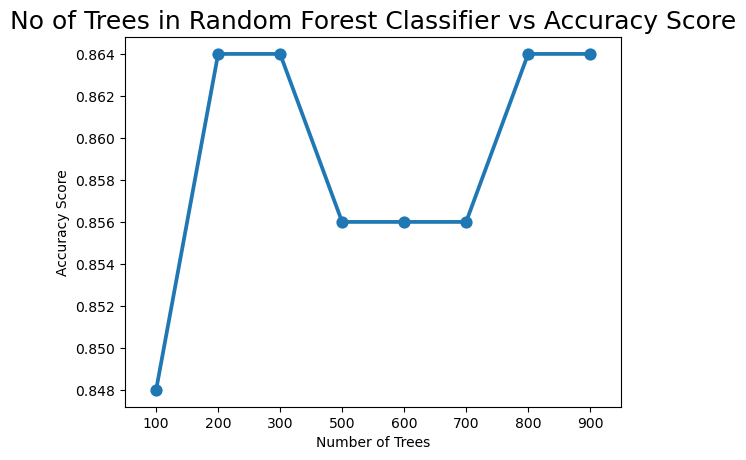

,No of trees,Accuracy score for RFC
0,100,0.848
1,200,0.864
2,300,0.864
3,500,0.856
4,600,0.856
5,700,0.856
6,800,0.864
7,900,0.864
8,100,0.848


In [35]:
trees_vs_acc = pd.DataFrame({'No of trees':trees_list,'Accuracy score for RFC':acc_score_for_tree_list})
sns.pointplot(x='No of trees', y='Accuracy score for RFC', data = trees_vs_acc)
plt.title('No of Trees in Random Forest Classifier vs Accuracy Score', size = 18)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')

plt.show()

trees_vs_acc.head(10)

### Adding Health Status Categories to the prediction model

In [36]:
def predict_category(config, model):
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    df_scaled = std_sc.transform(df)
    y_pred = model.predict(df_scaled)
    if y_pred == 0:
        return 'Very Underweight'
    elif y_pred == 1:
        return 'Underweight'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obese'
    elif y_pred == 5:
        return 'Extreme Obesity'

In [50]:
config = {
    'Gender': [1], # 1 for male and 2 for female
    'Height': [170],
    'Weight': [60]
}
predict_category(config, model)

'Normal'

### Creating Model

In [49]:
import pickle

pkl_filename = 'bmi_model.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

with open(pkl_filename, 'rb') as file:
    bmi_model = pickle.load(file)

score = bmi_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100*score))
y_prediction = bmi_model.predict(x_test)
print("Ypredictions:", y_prediction)

Test score: 86.40 %
Ypredictions: [5 2 3 4 4 5 5 5 4 5 4 5 1 5 5 3 5 5 3 5 2 5 1 4 4 5 5 5 5 2 5 5 4 4 4 2 5
 2 4 2 5 1 4 3 5 4 3 4 4 4 5 4 2 1 5 3 3 5 5 4 5 5 4 5 0 2 4 4 2 2 2 5 2 4
 5 5 5 4 3 5 5 3 2 5 4 5 3 5 4 3 1 2 5 4 5 2 5 5 1 5 5 5 5 5 3 3 4 5 4 5 3
 4 2 3 2 5 5 5 5 2 2 4 4 5 4]


In [51]:
predict_value = predict_category(config, bmi_model)
predict_value

'Normal'

### Creating the Scaler pickle

In [55]:
scaler_pkl = 'scaler.pkl'
with open(scaler_pkl,'wb') as f_out:
    pickle.dump(std_sc, f_out)